# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (4)

**03/10/2022**

# Análisis Descriptivo

Vamos a estudiar ahora un conocido conjunto de datos, para ello analizaremos y visualizaremos el siguiente dataset.

##  [Fisher’s Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set)

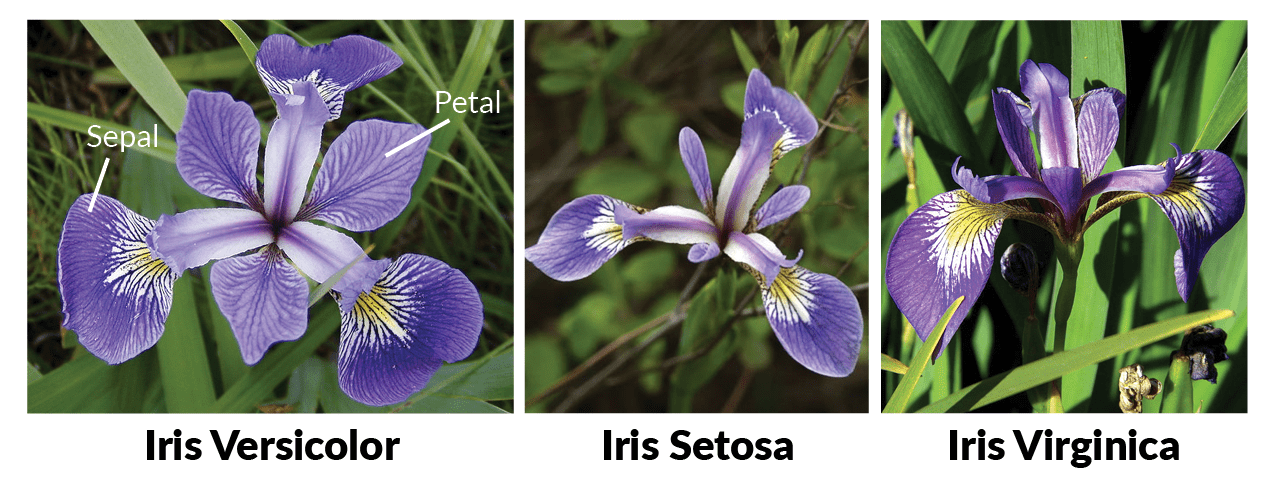



* El conjunto de datos de flores de Iris  es un conjunto de datos multivariante introducido por el estadístico y biólogo británico **Ronald Fisher** 
* El conjunto de datos consta de **50 muestras** de cada una de **las tres especies de Iris**:
    * Iris **setosa**
    * Iris **virginica** 
    * Iris **versicolor**
* Se midieron cuatro características de cada muestra:
    * el **largo** de los **sépalos**, en centímetros.
    * el **ancho** de los **sépalos**, en centímetros. 
    * el **largo** de los **pétalos**, en centímetros.
    * el **ancho** de los **pétalos**, en centímetros.
* Basado en la combinación de estas cuatro características, Fisher desarrolló un modelo discriminante lineal para **distinguir las especies** entre sí.    

In [3]:
# importamos las librerías necesarias 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# importamos los datos del ejemplo Fisher’s Iris data set
from sklearn.datasets import load_iris

In [3]:
# Construimos un dataframe con los datos medidos 
dataset = pd.DataFrame(load_iris()["data"],columns=load_iris()["feature_names"])

# Añadimos la especie como etiqueta
dataset["label"] = load_iris()["target_names"][load_iris()["target"]]

dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# Para hacernos una idea de cómo queda el dataframe mostramos las 10 primeras filas
dataset.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# Sacamos el tamaño del dataset completo
dataset.shape

(150, 5)

In [6]:
# Las etiquetas de filas y columnas
print(dataset.index)
print("\n")
print(dataset.columns)

RangeIndex(start=0, stop=150, step=1)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


In [7]:
# La frecuencia del label nos de el número de flores de cada especie que estamos analizando 
dataset['label'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: label, dtype: int64

In [8]:
# Para analizar mejor la información, podemos observar las estadísticas principales de los datos
dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Si queremos determinar la media y la mediana de las diferentes especies de flores presentes en el conjunto de datos. podemos usar el método **groupby()** usando como clave la especie de cada flor.

In [9]:
dataset.groupby('label').agg(['mean', 'median'])

sepal length (cm)        sepal width (cm)        petal length (cm)  \
                        mean median             mean median              mean   
label                                                                           
setosa                 5.006    5.0            3.428    3.4             1.462   
versicolor             5.936    5.9            2.770    2.8             4.260   
virginica              6.588    6.5            2.974    3.0             5.552   

                  petal width (cm)         
           median             mean median  
label                                      
setosa       1.50            0.246    0.2  
versicolor   4.35            1.326    1.3  
virginica    5.55            2.026    2.0

Una vez hemos analizado brevemente los valores de la tabla, pasaremos a visualizar los mismo con los siguientes diagramas:

### Scatterplot
Un diagrama de **dispersión (scatterplot)** es un tipo de diagrama matemático que utiliza las coordenadas cartesianas para mostrar los valores de dos variables para un conjunto de datos.

En este caso vamos a **comparar el ancho y el largo del sépalo** en las distintas especies de flores.  
  
Para ello usamo las gráficas de **[Seaborn](https://seaborn.pydata.org/)** que es una librería de visualización de datos de Python basada en **matplotlib**, con una interfaz de alto nivel que nos permite dibujar gráficos estadísticos atractivos y muy intuitivos.

In [5]:
# Importamos la librería usando su acrónimo universal 
import seaborn as sns

Text(0.5, 1.0, 'Comparación entre el ancho y el largo del sépalo según la especie')

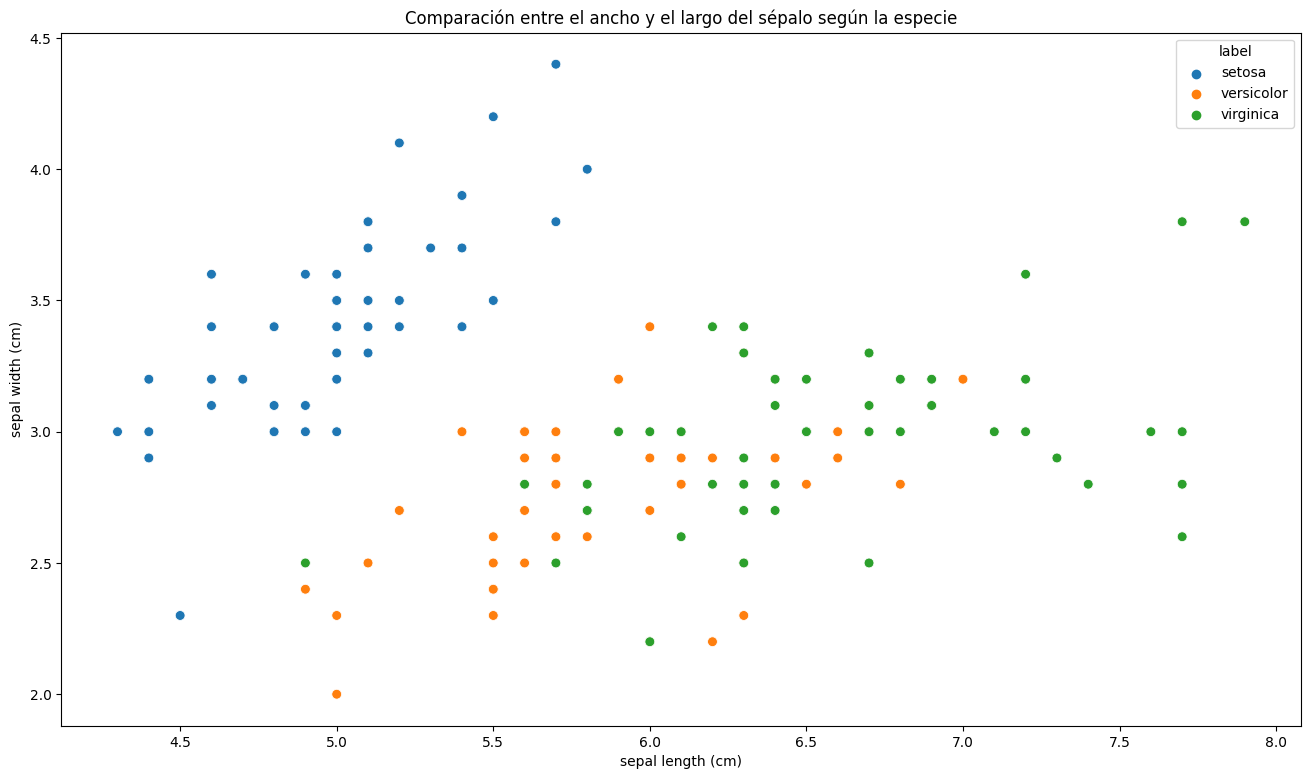

In [11]:
# Gráfico comparativo del ancho y el largo del sépalo 
plt.figure(figsize=(16,9))
sns.scatterplot(x = dataset['sepal length (cm)'], y = dataset['sepal width (cm)'], hue = dataset['label'], s= 50)
plt.title('Comparación entre el ancho y el largo del sépalo según la especie')



Observando el gráfico de dispersión (scatterplot) anterior podemos decir que **la especie iris-setosa tiene el sépalo más pequeño pero también el más ancho**. La especie **versicolor** se encuentra casi en el **medio** tanto en longitud como en ancho. Mientras que la especie **virginica** tiene sépalos más largos.

### Pairplot 
**Pairplot** representa la relación entre diferentes pares de variables presentes en el dataset. Los gráficos diagonales se tratan de la distribución de cada variable. 

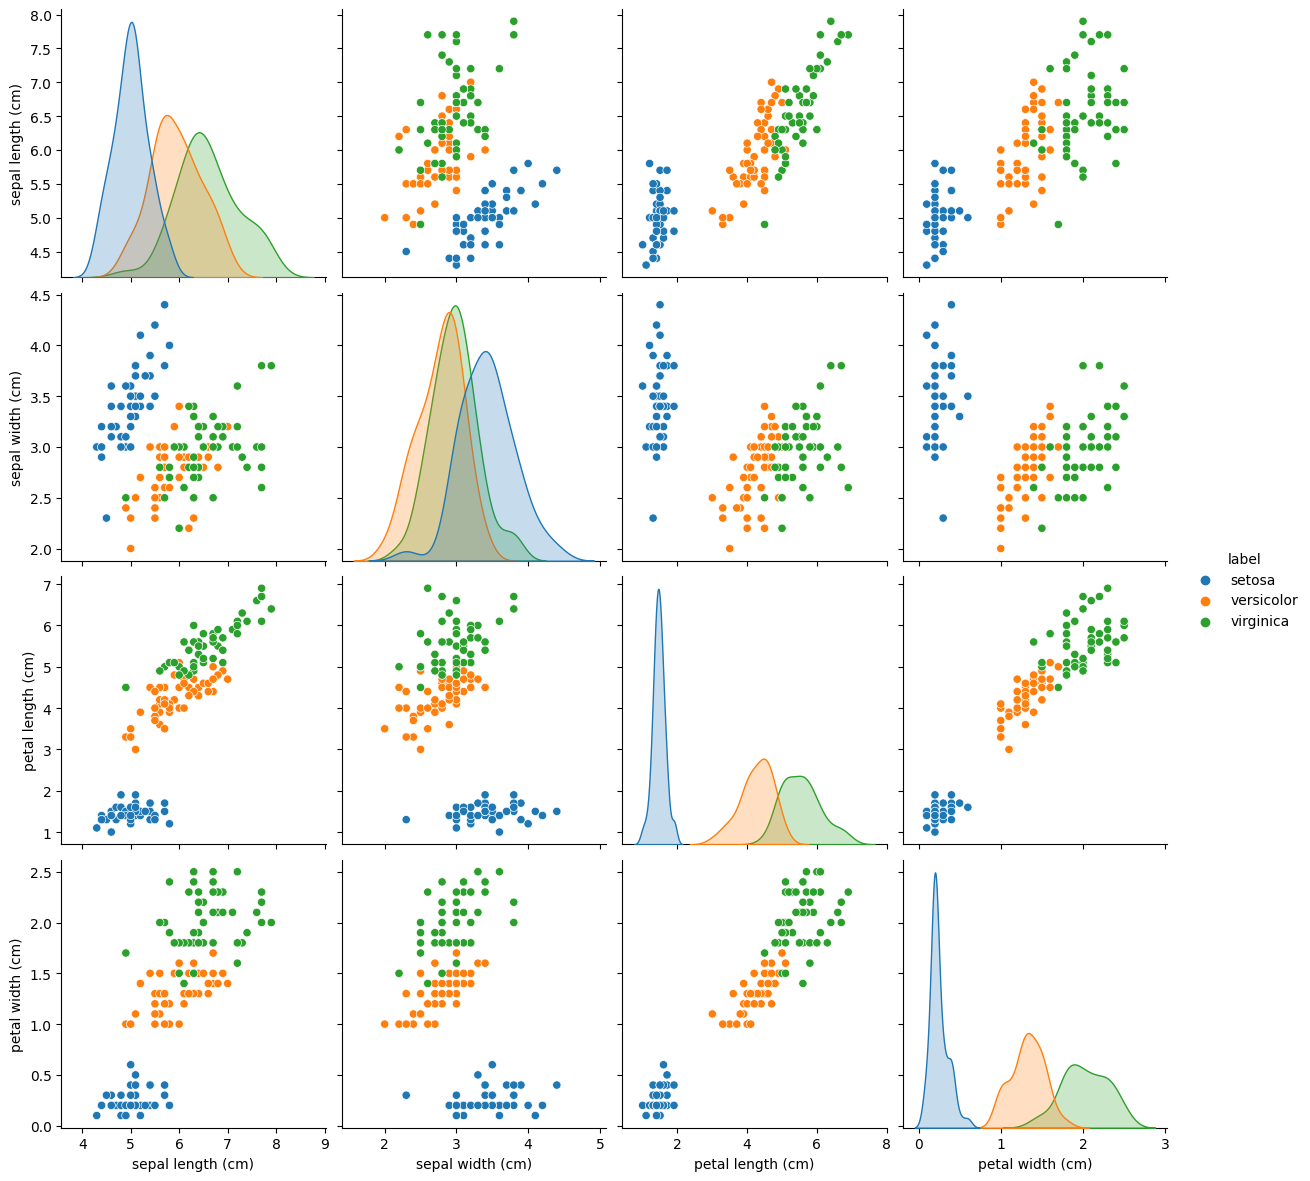

In [12]:
sns.pairplot(dataset, hue="label", height=3)

Observando la relación entre diferentes conjuntos de variable podemos ver que:  
- Las flores de especie setosa engeneral tiene una gran diferencia en sus características en comparación con las otras especies. 
- Las flores de especie versicolor suelen tener dimensiones medianas tanto de sépalo como de pétalo. Mientras la especie virginica tiene pétalos anchos y largos, y sépalos no muy anchos pero largos.

### Heatmap
Uno de los aspectoa más importantes entre las variables es su **correlación**. El método __.corr()__ en pandas DataFrames calcula la correlación por pares de columnas (excluyendo valores nulos) que son básicamente **la fuerza de la relación lineal entre dos variables continuas**.

Para estudiar visualmente la correlación entre variables podemos usar los **mapas de calor**.

<AxesSubplot:>

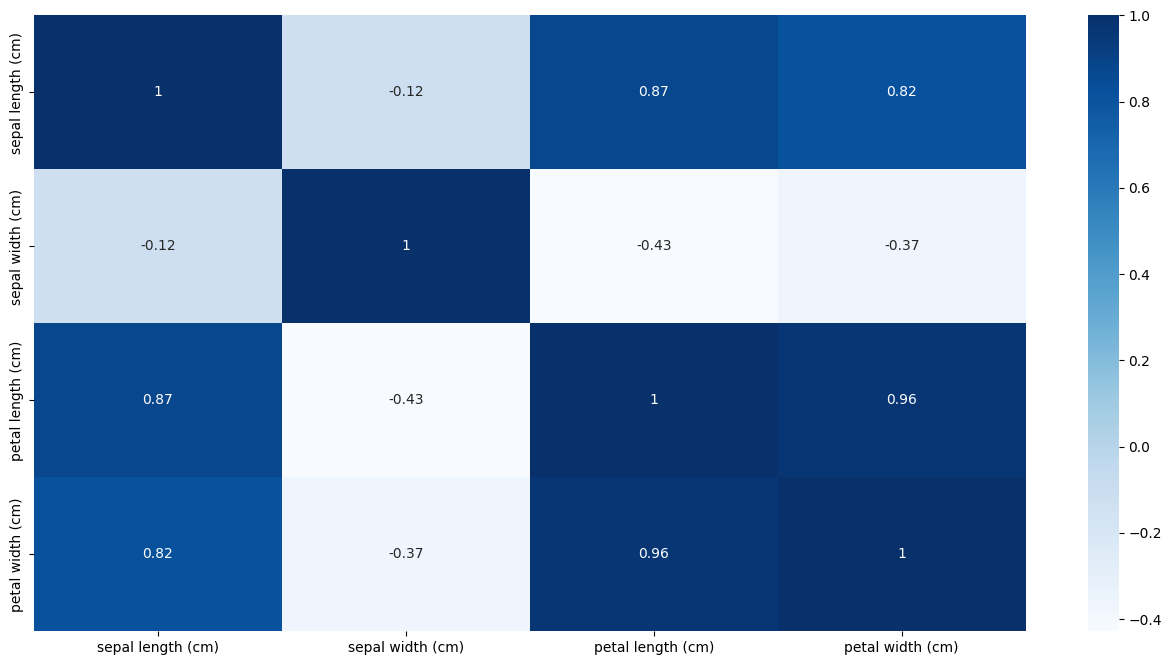

In [13]:
plt.figure(figsize = (16,8))
sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

* En el mapa de calor vemos que el largo del pétalo (**petal length**) y el ancho del pétalo (**petal width**) tienen una **alta correlación**. 
* petal width and sepal length tienen buena correlación. 
* También petal length and sepal length tienen buena correlación.

### Histogramas
Veamos la distribución de los datos para las distintas columnas de nuestro conjunto de datos.

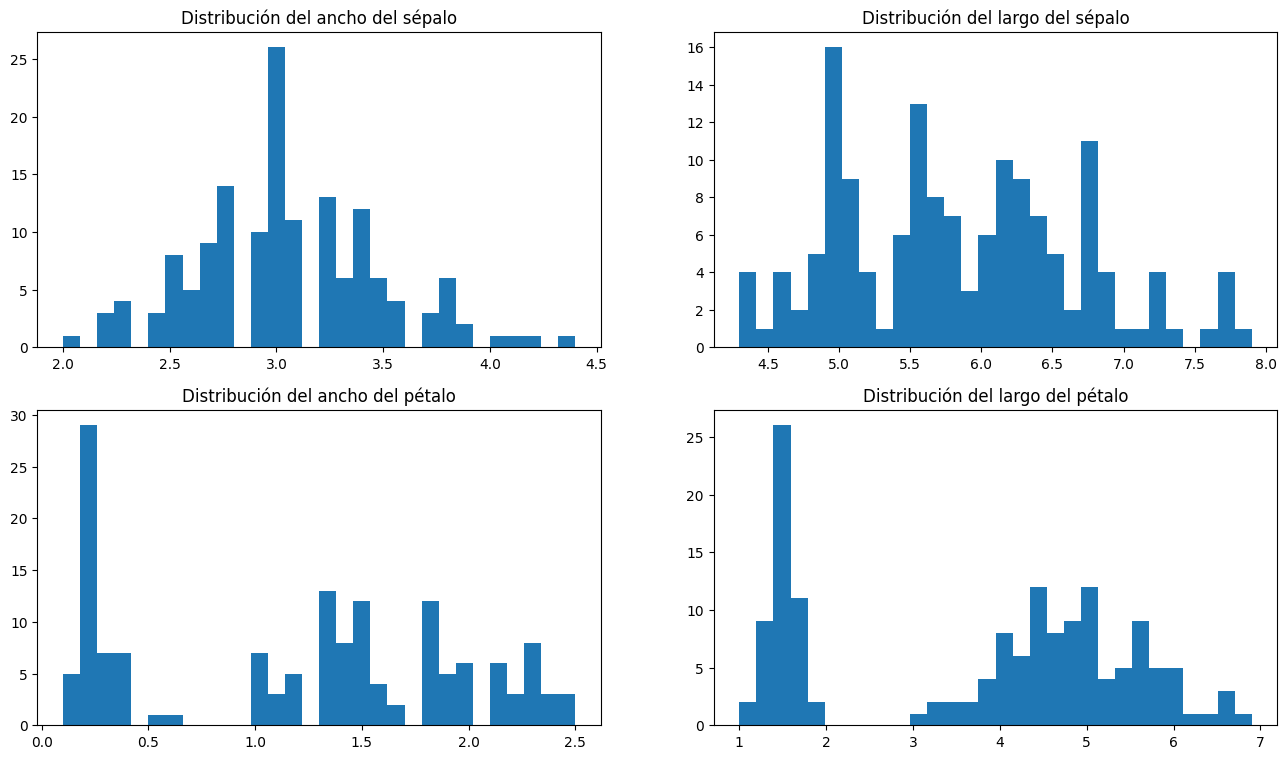

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribución del ancho del sépalo");
axes[0,0].hist(dataset['sepal width (cm)'], bins=30);

axes[0,1].set_title("Distribución del largo del sépalo");
axes[0,1].hist(dataset['sepal length (cm)'], bins=30);

axes[1,0].set_title("Distribución del ancho del pétalo");
axes[1,0].hist(dataset['petal width (cm)'], bins=30);

axes[1,1].set_title("Distribución del largo del pétalo");
axes[1,1].hist(dataset['petal length (cm)'], bins=30);

Se ve que las medidas del pétalo (**petal width** y **petal length**) contienen grupos más diversos y por lo tanto parecen como factores más **discriminatorios**.

### BoxPlot
Un **diagrama de caja** (boxplot) es una forma estandarizada de mostrar la distribución de datos basada en un resumen de cinco números:  
- mínimo  
- primer cuartil (Q1)
- mediana
- tercer cuartil (Q3)
- máximo  

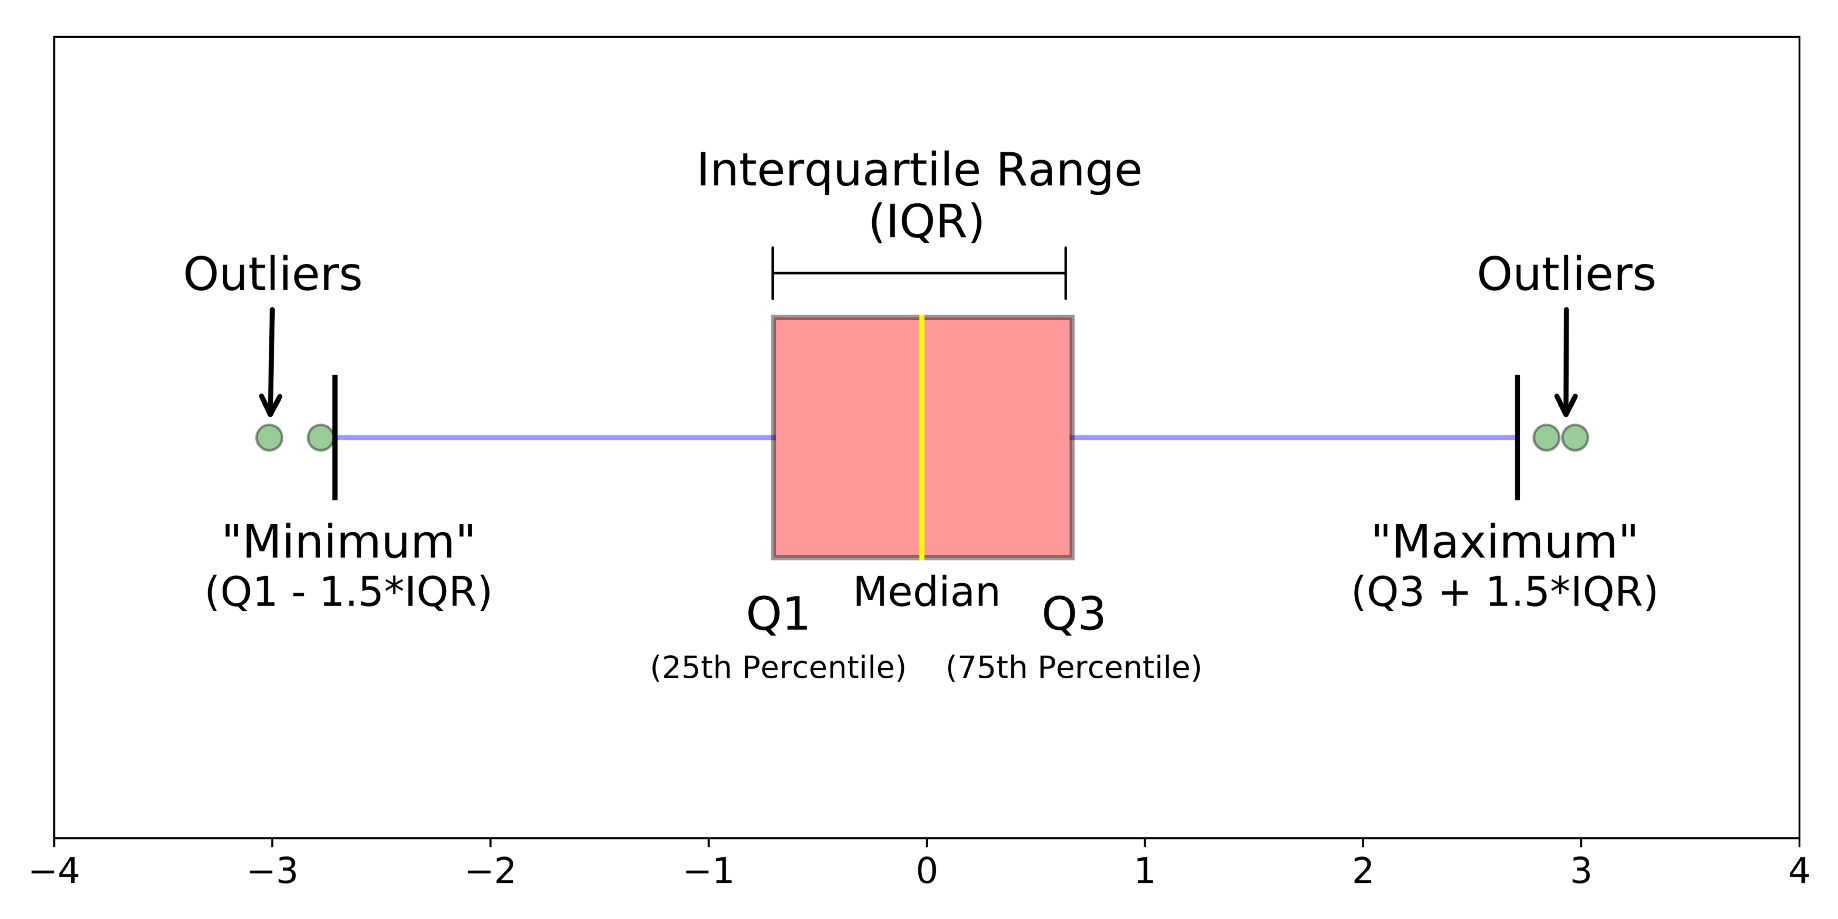

Este diagrama sirve sobre todo para informar de los **valores atípicos**. También puede indicar si los datos son simétricos, si están estrechamente agrupados y etc.

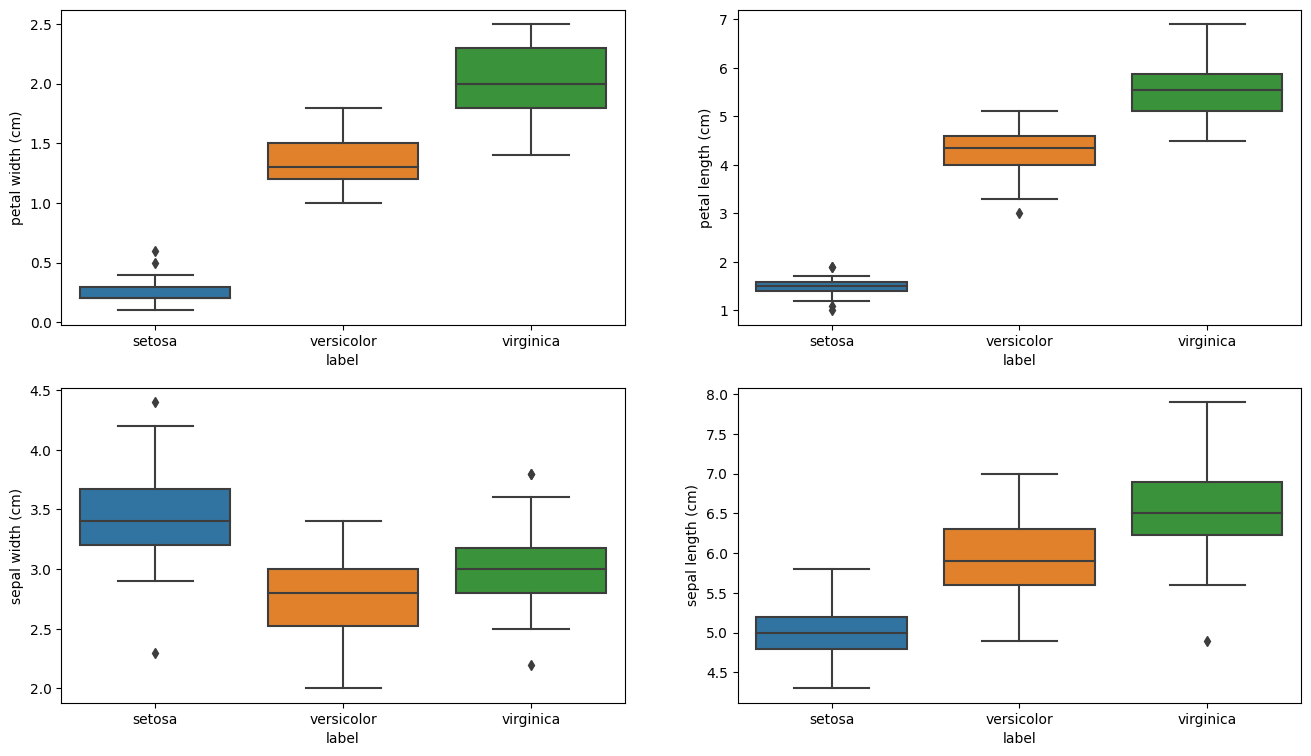

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(y="petal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 0])
sns.boxplot(y="petal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 1])
sns.boxplot(y="sepal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 0])
sns.boxplot(y="sepal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 1])
plt.show()

Vemos que los diagramas de caja (**boxplot**) describen que la setosa generalmente tiene características más pequeñas.
La especie Versicolor tiene características promedio.
La especie virginica tiene las características de tamaño más grandes en comparación con otras.

### Violin plot
Podemos observar mejor las distribuciones usando el diagrama de violín en nuestro conjunto de datos.

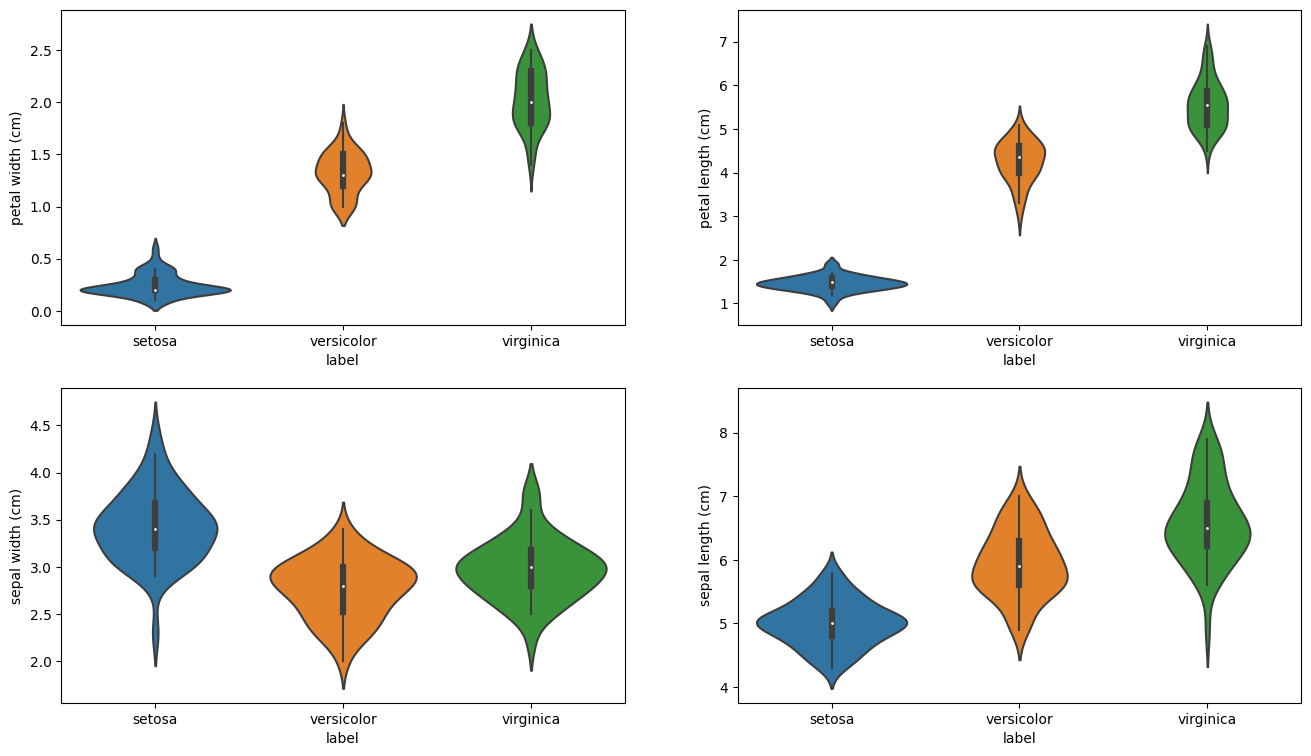

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(y="petal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 0])
sns.violinplot(y="petal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[0, 1])
sns.violinplot(y="sepal width (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 0])
sns.violinplot(y="sepal length (cm)", x= "label", data=dataset,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusiones
* El conjunto de datos está **equilibrado**, es decir, existen las mismas cantidades de registros para las tres especies.
* Tenemos cuatro columnas numéricas y solo **una columna categórica**.
* Existe una fuerte **correlación** entre el **ancho** y el **largo** de los **pétalos**.
* La especie **Setosa** es la más fácilmente distinguible debido a su **pequeño tamaño**.
* Las especies Versicolor y Virginica generalmente se mezclan y a veces son difíciles de separar, aunque **Versicolor** tiene características de **tamaño promedio** y **Virginica** tiene características de **tamaños más grandes**.

---

### **`Ejercicio 5.1`**

Conseguimos el Dataset de [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) que contiene datos del consumo de combustible de diversos modelos de coches. 

**`5.1.1`** Dibuja una gráfica que muestre la relación entre las variables del dataset.   
**`5.1.2`** ¿Entre qué conjunto de variables se puede considerar que hay una relación?  
**`5.1.3`** Calcula el coeficiente de correlación entre las variables del dataset y dibújalos en una gráfica. Modifica la respuesta del paso anterior si lo consideras necesario según los coeficientes calculados.      
**`5.1.4`** Dibuja un diagrama de dispersión entre el peso y la potencia, pintando los puntos del gráfico según el número de cilindros.    
**`5.1.5`** Dibuja un diagrama de dispersión entre el peso y la potencia, pintando los puntos del gráfico según el año de fabricación. Comparando este nuevo gráfico con el anterior, ¿podemos decir qué criterio tiene más capacidad para agrupar los coches o mejor dicho es un factor discriminatorio mayor que el otro?  
**`5.1.6`** Saca el mismo gráfico que dibujaste en el ejercicio `5.1.5`, esta vez solamente para los coches fabricados en el año __70__.   
**`5.1.7`** Saca el mismo gráfico que dibujaste en el ejercicio `5.1.5`, esta vez solamente para los coches fabricados en el año __80__.   ¿Cuáles son las diferencias más destacables entre las relaciones dibujadas del año 70 y del año 80?


In [6]:
### Ejercicio 5.1

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

mpg_data = pd.read_csv(path, delim_whitespace=True, header=None,
            names = ['mpg', 'cilindros', 'desplazamiento','potencia',
            'peso', 'aceleración', 'año', 'origen', 'nombre'],
            na_values='?')

# El DataFrame que se carga
mpg_data

,mpg,cilindros,desplazamiento,potencia,peso,aceleración,año,origen,nombre
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [18]:
# Modificar los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"


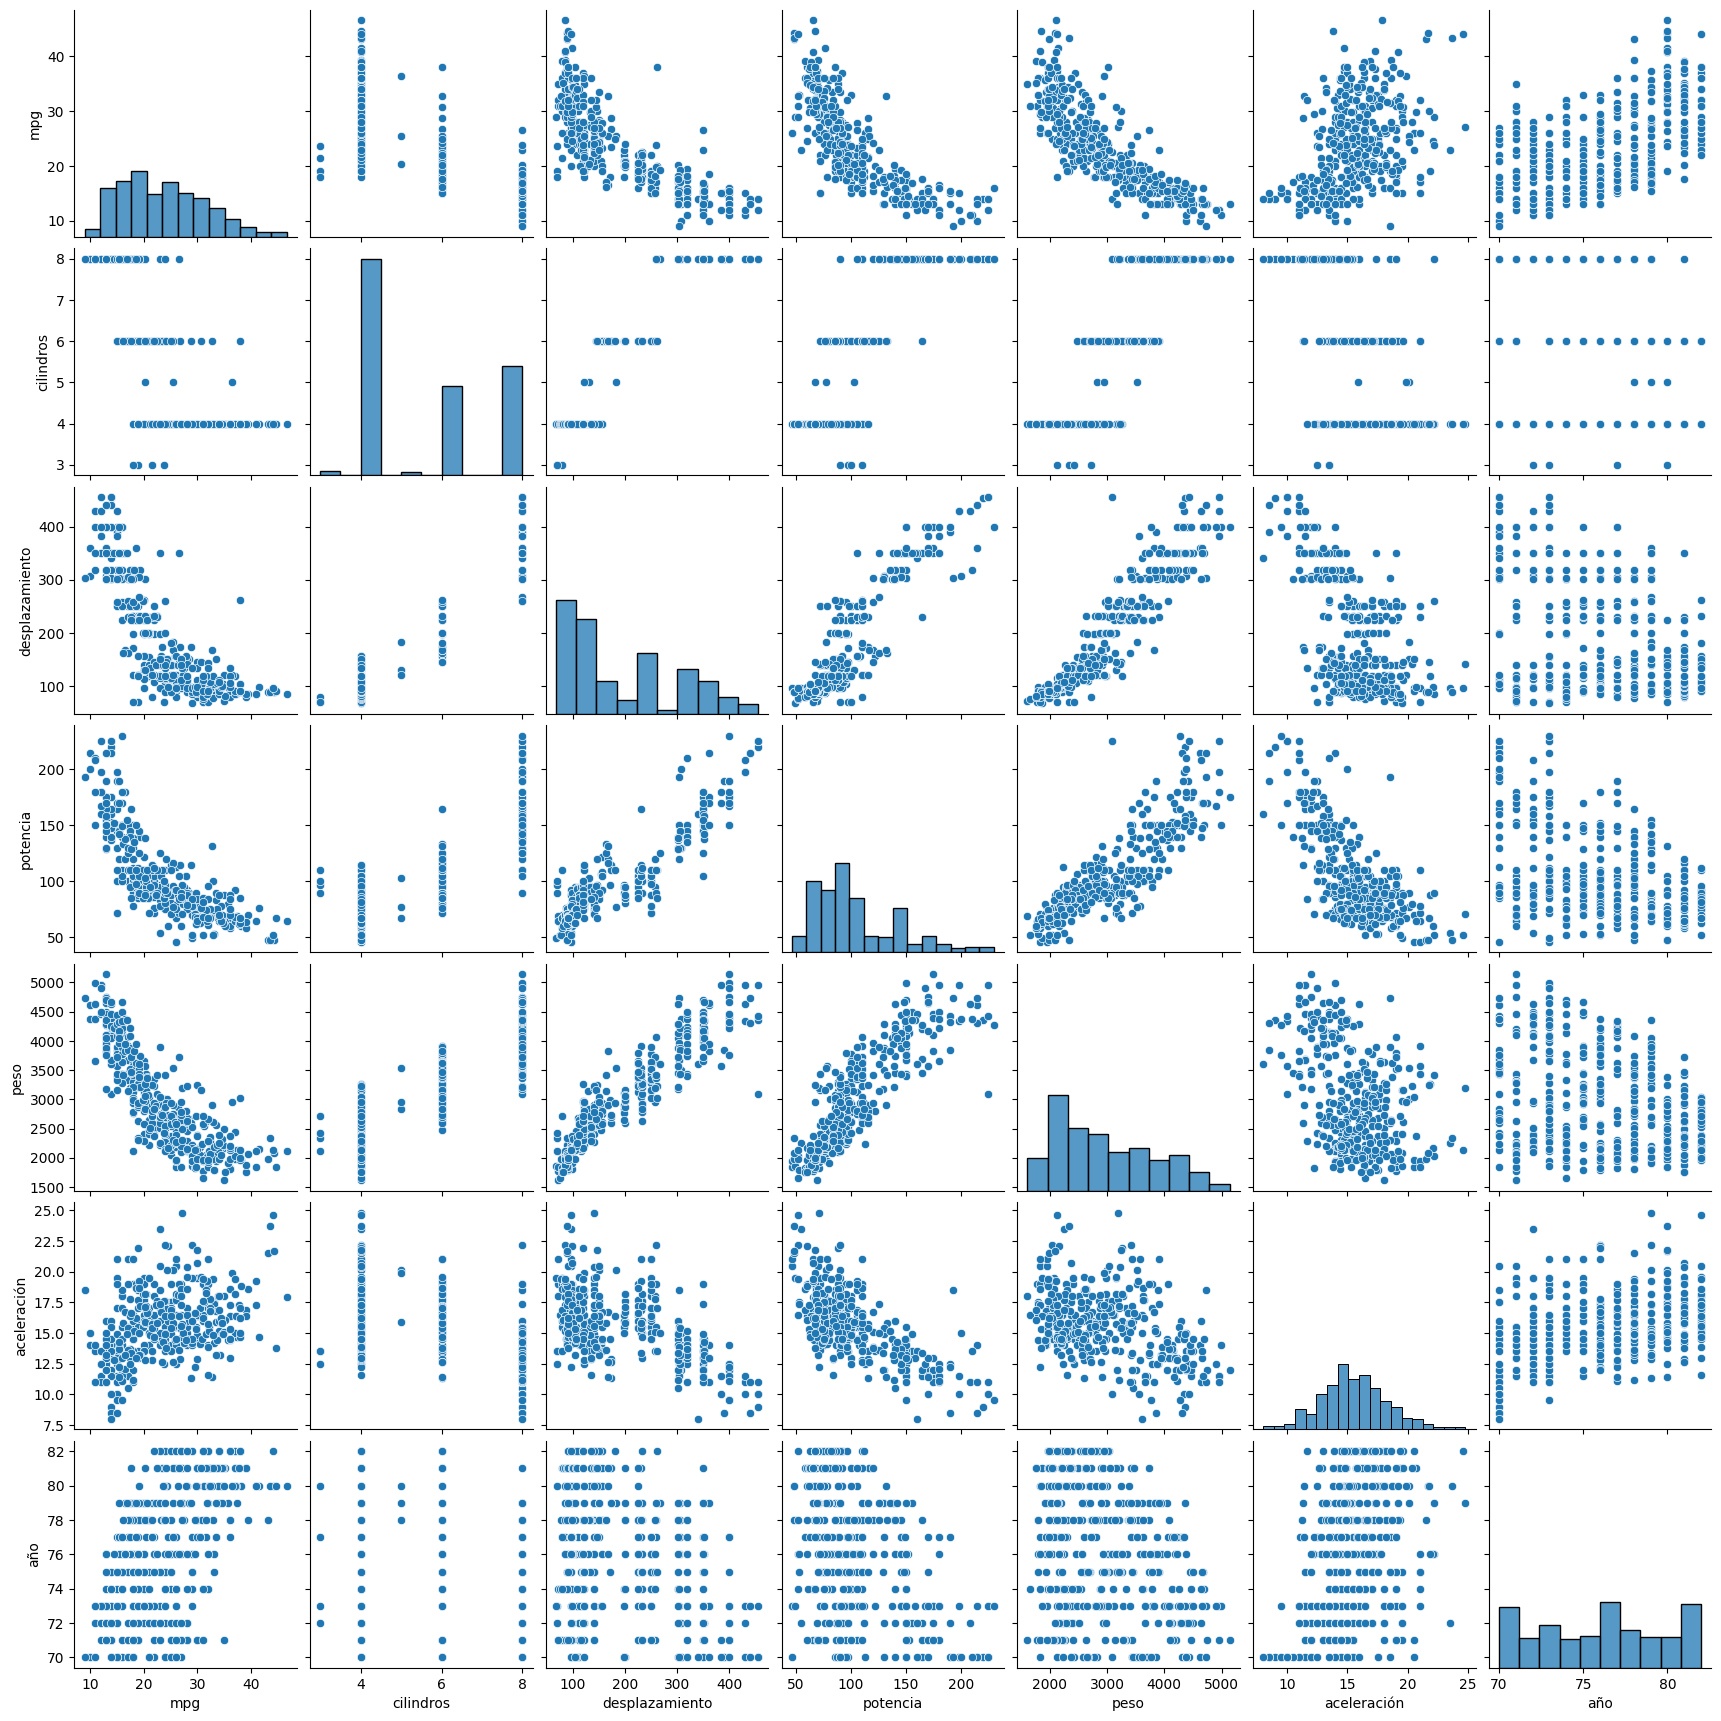

In [7]:
## Solución
# Ejercicio 5.1.1
#plt.figure(figsize = (16,8))
#sns.heatmap(mpg_data.corr(), cmap='Blues', annot = True)
nombre_mpgData=mpg_data[['mpg','cilindros','desplazamiento','potencia','peso','aceleración','año']]
sns.pairplot(nombre_mpgData)

In [10]:
## Solución
# Ejercicio 5.1.2
relacion_mpg="Desplazamiento,potencia,peso"
relacion_clindros="Aceleracion,peso,potencia"
relacion_desplazamientos="Peso,potencia"
relacion_potencia="Peso,desplazamiento"
relacion_peso="Potencia,desplazamiento"
relacion_aceleracion="Peso,desplazamiento"
relacion_año="Desplazamiento,peso"
print("Relacion mpg: \n La relacion que veo en mpg es:",
      relacion_mpg,"\n"
      "Relacion cilindros: \n La relacion que veo en cilindros es:"
      ,relacion_clindros,"\n"
      "Relacion desplazamiento: \n La relacion que veo en desplazamiento es:",
      relacion_desplazamientos,"\n"
      "Relacion potencia: \n La relacion que veo en potencia es:"
      ,relacion_potencia,"\n"
      "Relacion peso: \n La relacion que veo en peso es:"
      ,relacion_peso,"\n"
      "Relacion cilindros: \n La relacion que veo en aceleracion es:"
      ,relacion_aceleracion,"\n"
      "Relacion cilindros: \n La relacion que veo en año es:"
      ,relacion_año
      )

Relacion mpg: 
 La relacion que veo en mpg es: Desplazamiento,potencia,peso 
Relacion cilindros: 
 La relacion que veo en cilindros es: Aceleracion,peso,potencia 
Relacion desplazamiento: 
 La relacion que veo en desplazamiento es: Peso,potencia 
Relacion potencia: 
 La relacion que veo en potencia es: Peso,desplazamiento 
Relacion peso: 
 La relacion que veo en peso es: Potencia,desplazamiento 
Relacion cilindros: 
 La relacion que veo en aceleracion es: Peso,desplazamiento 
Relacion cilindros: 
 La relacion que veo en año es: Desplazamiento,peso


<AxesSubplot:>

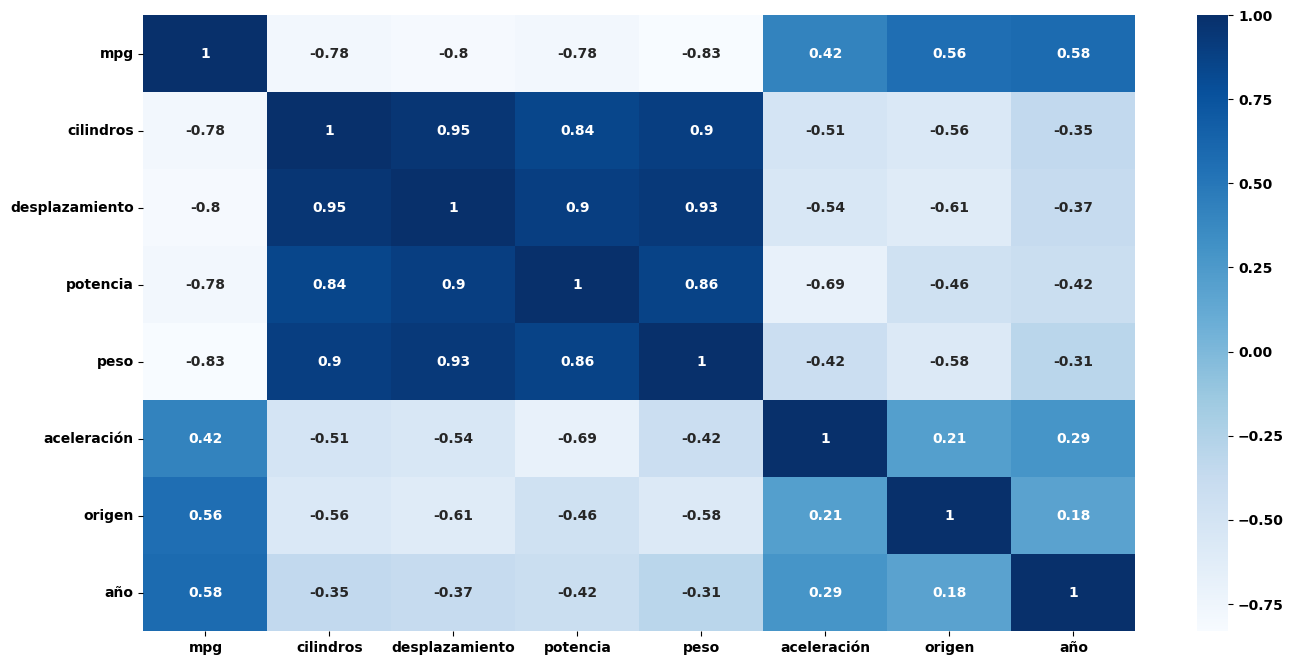

In [20]:
## Solución
# Ejercicio 5.1.3
plt.figure(figsize = (16,8))
sns.heatmap(nombre_mpgData.corr(), cmap='Blues', annot = True)

Text(0.5, 1.0, 'Comparación entre el peso y la potencia segun los cilindros')

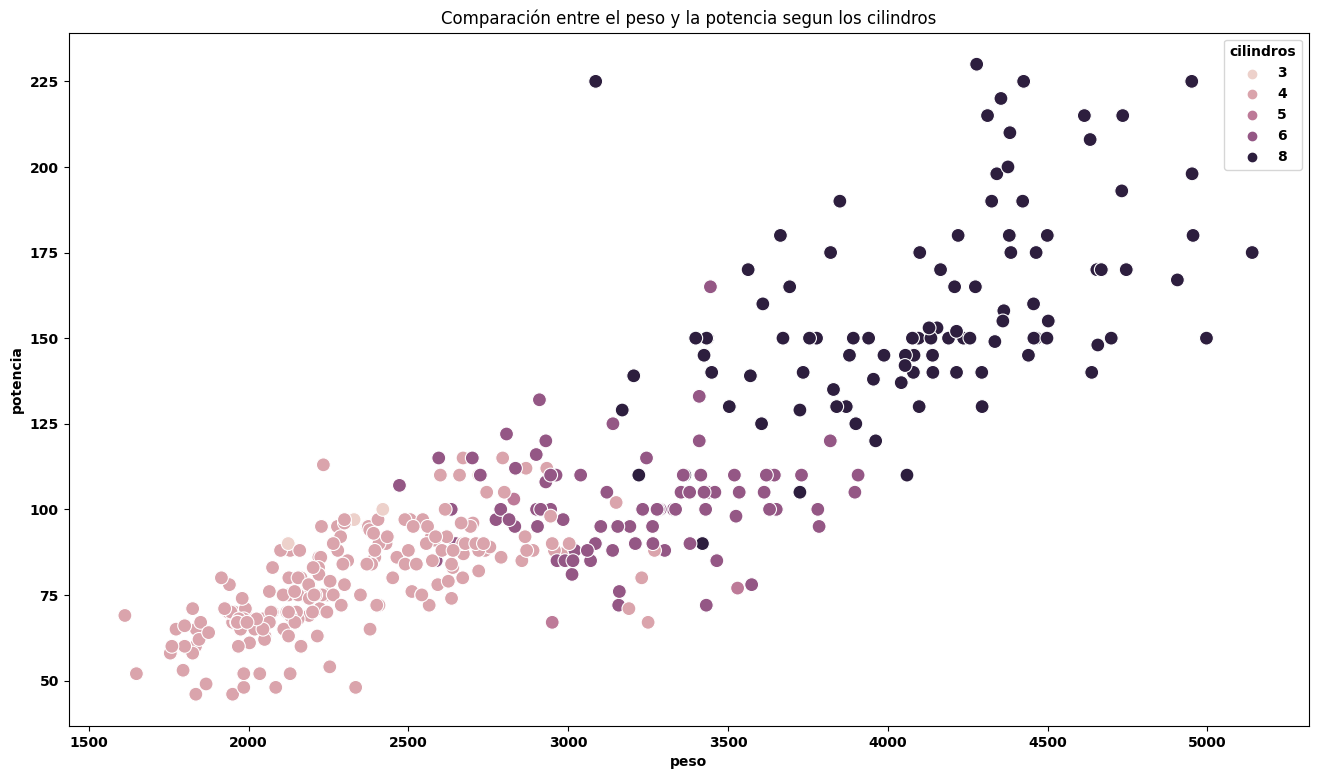

In [21]:
## Solución
# Ejercicio 5.1.4
peso_mpg_data=mpg_data['peso']
potencia_mpg_data=mpg_data['potencia']
cilindros_mpg_data= mpg_data['cilindros']
plt.figure(figsize=(16,9))
sns.scatterplot(x = peso_mpg_data, 
                y = potencia_mpg_data, 
                hue = cilindros_mpg_data, s= 100)
plt.title('Comparación entre el peso y la potencia segun los cilindros')

Text(0.5, 1.0, 'Comparación entre el peso y la potencia segun el año')

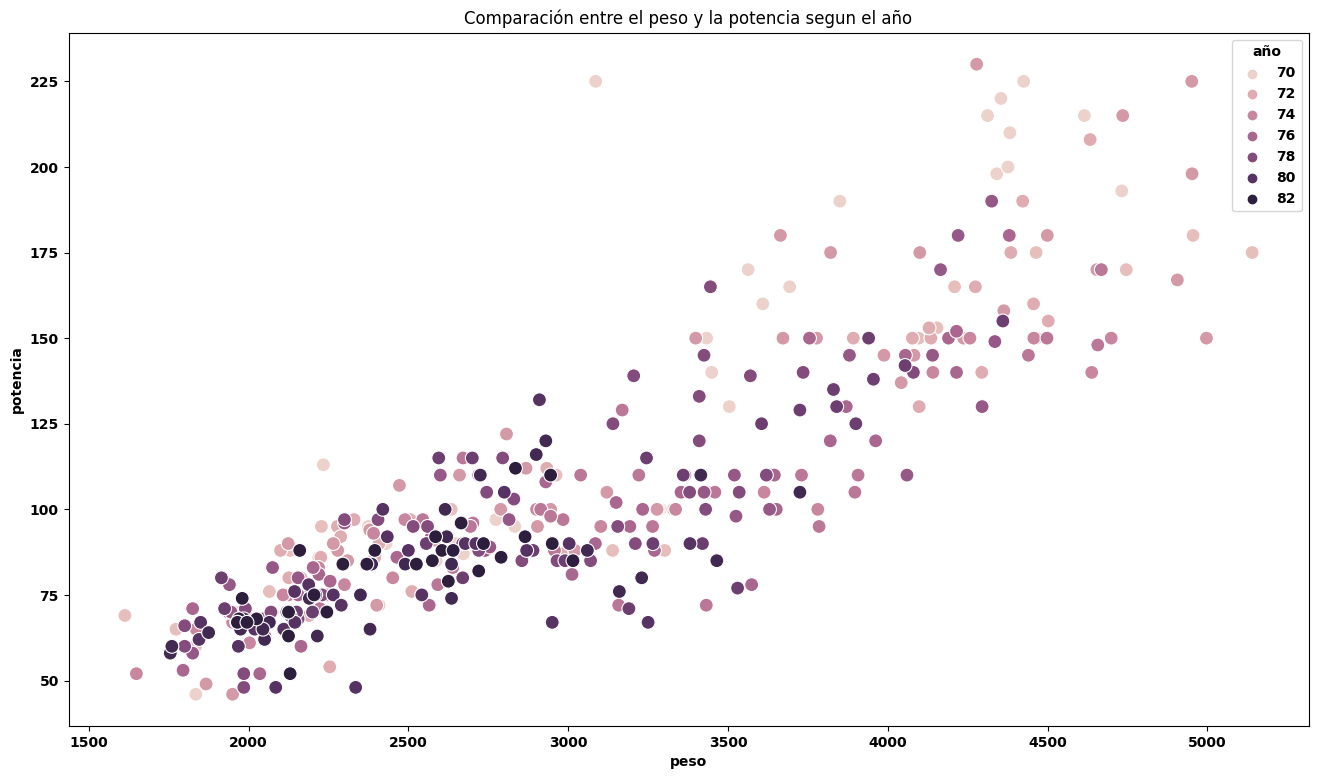

In [22]:
## Solución
# Ejercicio 5.1.5
año_mpg_data=mpg_data['año']
plt.figure( figsize=(16,9))
sns.scatterplot(x = peso_mpg_data, 
                y = potencia_mpg_data, 
                hue =año_mpg_data , s= 100)
plt.title('Comparación entre el peso y la potencia segun el año')
#La manera mas optima para agrupar es la agrupacion por cilindros,como podemos comprobar en las 2 graficas


<AxesSubplot:xlabel='potencia', ylabel='peso'>

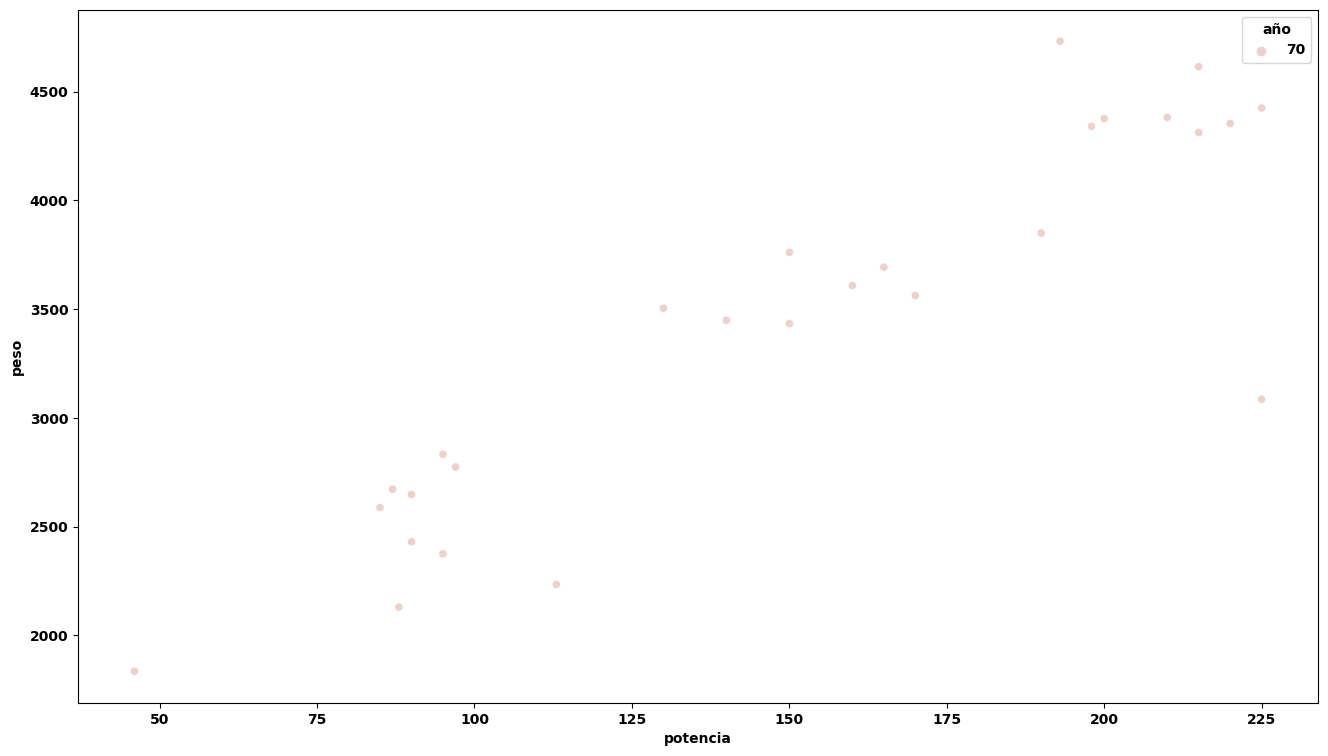

In [34]:
## Solución
# Ejercicio 5.1.6


filtrado_año_70=mpg_data[mpg_data['año']==70]
potencia_año_70_mpg_data=filtrado_año_70['potencia']
peso_año_70_mpg_data=filtrado_año_70['peso']
año_70_mpg_data=filtrado_año_70['año']
plt.figure(figsize=(16,9))
sns.scatterplot(x= potencia_año_70_mpg_data,
                y= peso_año_70_mpg_data,
                hue= año_70_mpg_data
                
)


'Tal y como vemos en las 2 graficos de decadas diferentes,en la decada de los 70 la potencia aumenta a la vez que aumnenta el peso,lo que significa que es proporcional,por el contrario en la decada de los 80 hay diferentes pesos que tienen la misma potencia.    Conclusion: La decada de los 70 los valores son proporcionales y en la decada de los 80 no.'

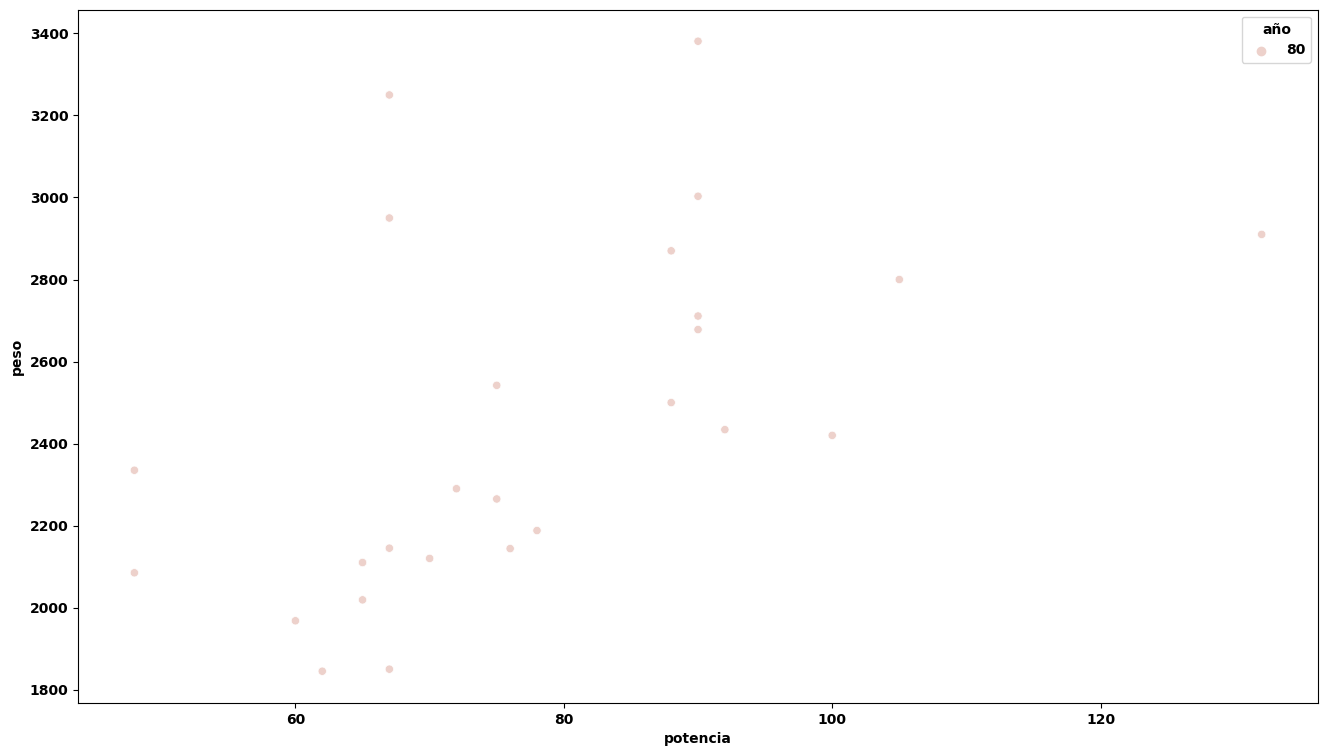

In [38]:
## Solución
# Ejercicio 5.1.7
filtrado_año_80=mpg_data[mpg_data['año']==80]
potencia_año_80_mpg_data=filtrado_año_80['potencia']
peso_año_80_mpg_data=filtrado_año_80['peso']
año_80_mpg_data=filtrado_año_80['año']
plt.figure(figsize=(16,9))
sns.scatterplot(x= potencia_año_80_mpg_data,
                y= peso_año_80_mpg_data,
                hue= año_80_mpg_data
                
)
"Tal y como vemos en las 2 graficos de decadas diferentes,en la decada de los 70 la potencia aumenta a la vez que aumnenta el peso,lo que significa que es proporcional,por el contrario en la decada de los 80 hay diferentes pesos que tienen la misma potencia.    Conclusion: La decada de los 70 los valores son proporcionales y en la decada de los 80 no."



---

### **`Ejercicio 5.2`**

En un restaurante, un camarero registró los siguientes [datos](https://rdrr.io/cran/reshape2/man/tips.html) sobre todos los clientes durante un intervalo de dos meses y medio a principios de 1990.  
El restaurante, ubicado en un centro comercial suburbano, era parte de una cadena nacional y servía un menú variado. En cumplimiento de la ley local, el restaurante ofrecía además sentarse en una sección para no fumadores a los clientes que así lo solicitaban.

**`5.2.1`** Saca todas las estadísticas principales de las variables del dataset.  
**`5.2.2`** Comprueba si hay valores perdidods en el dataset y si fuera así en qué registros existen estos valores.

**`5.2.3`** Clacula qué porcentaje de los clientes que dan propina son hombres y qué porcentaje son mujeres?  
**`5.2.4`** Agrupa los datos según estas variables, calculando el __tamaño__, la __mediana__ y la __media__ para cada grupo:  
- 'sex'  
- 'smoker'  
- 'day'  
- 'time'  
- 'size'  
  
**`5.2.5`** Dibuja una gráfica que muestre para cada grupo de personas servidas en el restaurante, el promedio de las propinas pagadas.  
**`5.2.6`** Dibuja una gráfica que muestre la relación entre las variables del dataset, pintando los datos según las siguientes variables:  
- 'sex'  
- 'smoker'  
- 'day'  
- 'time'  
- 'size'  

**`5.2.7`** Teniendo en cuenta todos los calculos realizados sobre este dataset y las gráficas dibujadas anteriormente, ¿cuáles serían los factores diferenciadores que más afectan a la cantidad de las proponia recibidas por el camarero?  
**`5.2.8`** Calcula el tercer cuartil para la variable `'tip'` y filtra todo el dataset según este valor para que el DataFrame resultante solamente contenga valores iguales o mayores que esa cantidad de propinas.  
**`5.2.9`** Dibuja los histogramas que se pueden obtener para las siguientes variables del dataset obtenido en el paso anterior:  
- 'smoker'  
- 'day'  
- 'time'  
- 'size'  

**`5.2.10`** Considerando todo el análisis realizado anteriormente, haz una recomendación al camarero para que lo tenga en cuenta a la hora de repartir los clientes entre el personal del restaurante, y muestra que de esa manera él puede conseguir mayor cantidad de proponas!! 



  


  


In [39]:
### Ejercicio 5.2

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [40]:
## Solución
# Ejercicio 5.2.1
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [42]:
## Solución
# Ejercicio 5.2.2

"Gracias a las funciones isnull y sum podemos obtener una tabala con los campos del dataframe con el numero total de valores nulos,en nuestro caso no tenemos ninguno."
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [62]:
## Solución
# Ejercicio 5.2.3
"Hay 2 formas de resolver este ejercicio,la manera optima seria usando la funcion groupby para agrupar por categoria,la otra seria la solucion chorra"
#Forma chorra
propina_total=tips['tip'].sum()
propina_hombres=tips.loc[tips['sex']=='Male']['tip'].sum()
propina_mujeres=tips.loc[tips['sex']=='Female']['tip'].sum()
print("Propina total:",
      propina_total,
      "\nPropina hombres:",
      (propina_hombres/propina_total*100).round(2),
      "\nPropina mujeres:",
      (propina_mujeres/propina_total*100).round(2)
      )
#Forma optima
total_propinas=tips["tip"].sum()
porcentage_propinas_clientes=tips.groupby("sex").sum()["tip"]/total_propinas*100
porcentage_propinas_clientes.round(2)

Propina total: 731.5799999999999 
Propina hombres: 66.3 
Propina mujeres: 33.7


sex
Male      66.3
Female    33.7
Name: tip, dtype: float64

In [65]:
## Solución
# Ejercicio 5.2.4
"Hay 2 formas de resolver este ejercicio,la manera optima seria usando la funcion groupby combinando la funcion agg y la manera seria la forma chorra" 
#Forma chorra
tamaño_tips=tips.groupby(['sex','smoker','day','time','size']).size() 
media_tips=tips.groupby(['sex','smoker','day','time','size']).mean()
mediana_tips=tips.groupby(['sex','smoker','day','time','size']).median()
display(tamaño_tips)
display(media_tips)
display(mediana_tips)
#Forma optima
tam_mean_median_tips=tips.groupby(['sex','smoker','day','time','size']).agg(["mean","median","size"])
tam_mean_median_tips

sex     smoker  day   time    size
Male    Yes     Thur  Lunch   1       0
                              2       8
                              3       1
                              4       1
                              5       0
                                     ..
Female  No      Sun   Dinner  2       5
                              3       4
                              4       4
                              5       1
                              6       0
Length: 192, dtype: int64

total_bill     tip
sex    smoker day  time   size                    
Male   Yes    Thur Lunch  1            NaN     NaN
                          2       19.05875  2.8225
                          3       18.71000  4.0000
                          4       20.53000  4.0000
                          5            NaN     NaN
...                                    ...     ...
Female No     Sun  Dinner 2       14.56200  2.5480
                          3       17.30500  2.7925
                          4       29.91500  4.3900
                          5       29.85000  5.1400
                          6            NaN     NaN

[192 rows x 2 columns]

total_bill    tip
sex    smoker day  time   size                   
Male   Yes    Thur Lunch  1            NaN    NaN
                          2         16.290  2.290
                          3         18.710  4.000
                          4         20.530  4.000
                          5            NaN    NaN
...                                    ...    ...
Female No     Sun  Dinner 2         14.830  2.610
                          3         16.590  2.750
                          4         29.905  4.375
                          5         29.850  5.140
                          6            NaN    NaN

[192 rows x 2 columns]

total_bill                  tip            
                                     mean  median size    mean median size
sex    smoker day  time   size                                            
Male   Yes    Thur Lunch  1           NaN     NaN    0     NaN    NaN    0
                          2      19.05875  16.290    8  2.8225  2.290    8
                          3      18.71000  18.710    1  4.0000  4.000    1
                          4      20.53000  20.530    1  4.0000  4.000    1
                          5           NaN     NaN    0     NaN    NaN    0
...                                   ...     ...  ...     ...    ...  ...
Female No     Sun  Dinner 2      14.56200  14.830    5  2.5480  2.610    5
                          3      17.30500  16.590    4  2.7925  2.750    4
                          4      29.91500  29.905    4  4.3900  4.375    4
                          5      29.85000  29.850    1  5.1400  5.140    1
                          6           NaN     NaN    0     NaN    NaN    0

[192 rows x 6 columns]

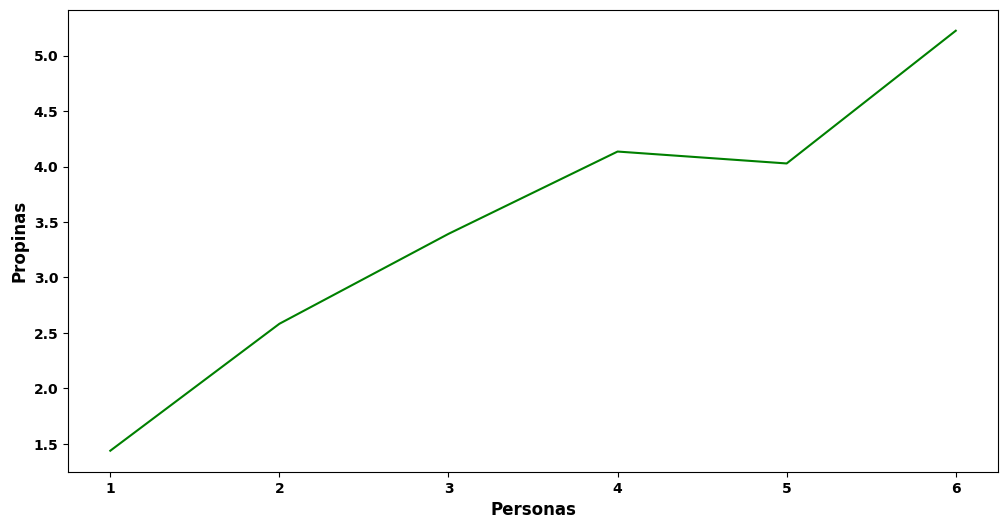

In [67]:
## Solución
# Ejercicio 5.2.5  Dibuja una gráfica que muestre para cada grupo de personas servidas en el restaurante, el promedio de las propinas pagadas.  
media_size_tips=tips.groupby("size")["tip"].mean()
plt.plot (media_size_tips,color='green')
plt.xlabel('Personas', fontsize='large', fontweight='bold')
plt.ylabel('Propinas', fontsize='large', fontweight='bold')
plt.show()


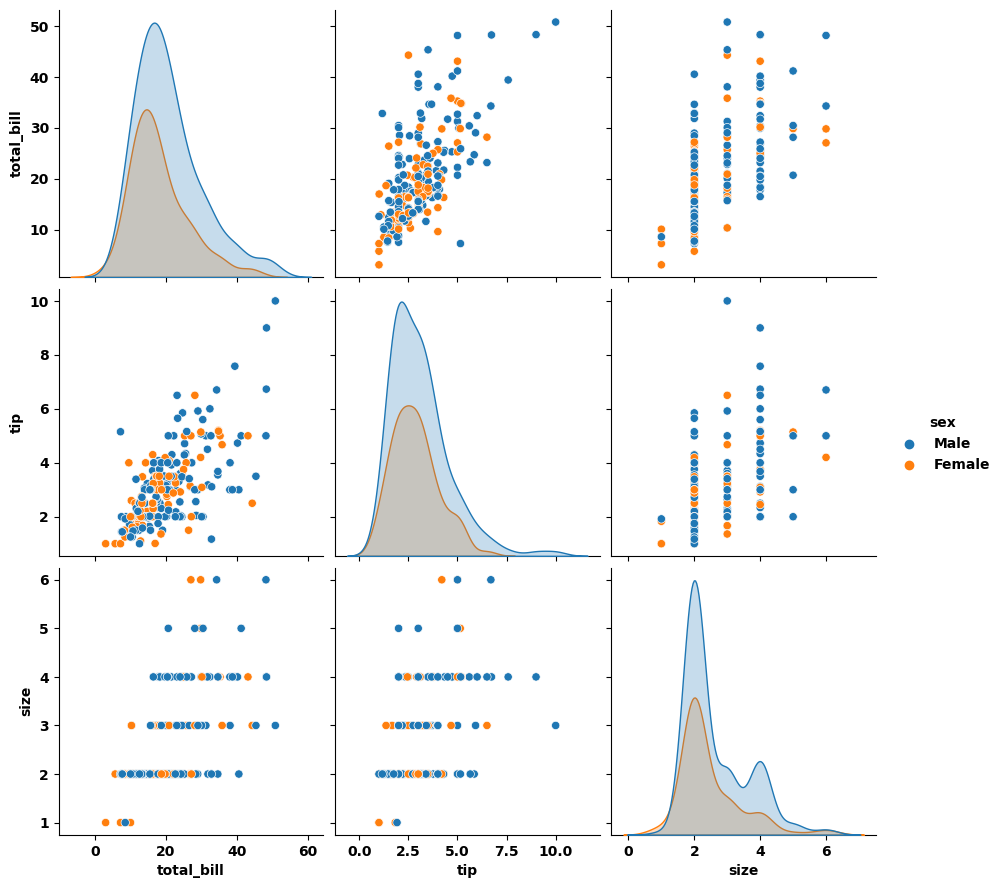

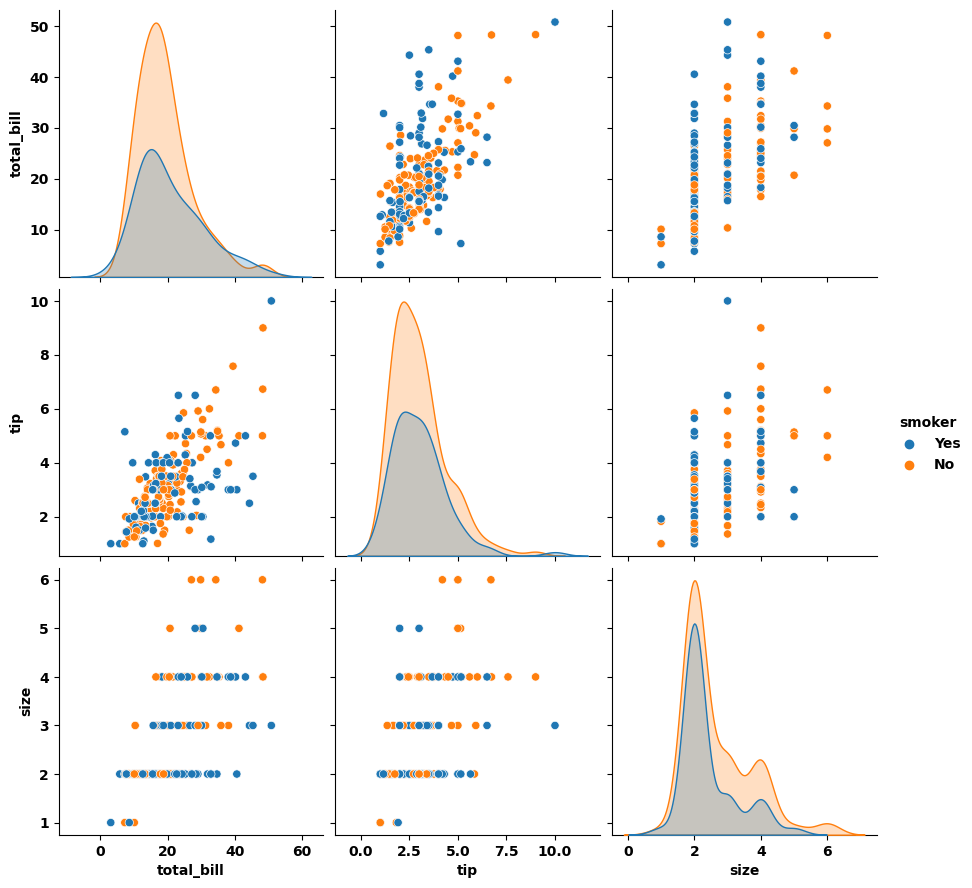

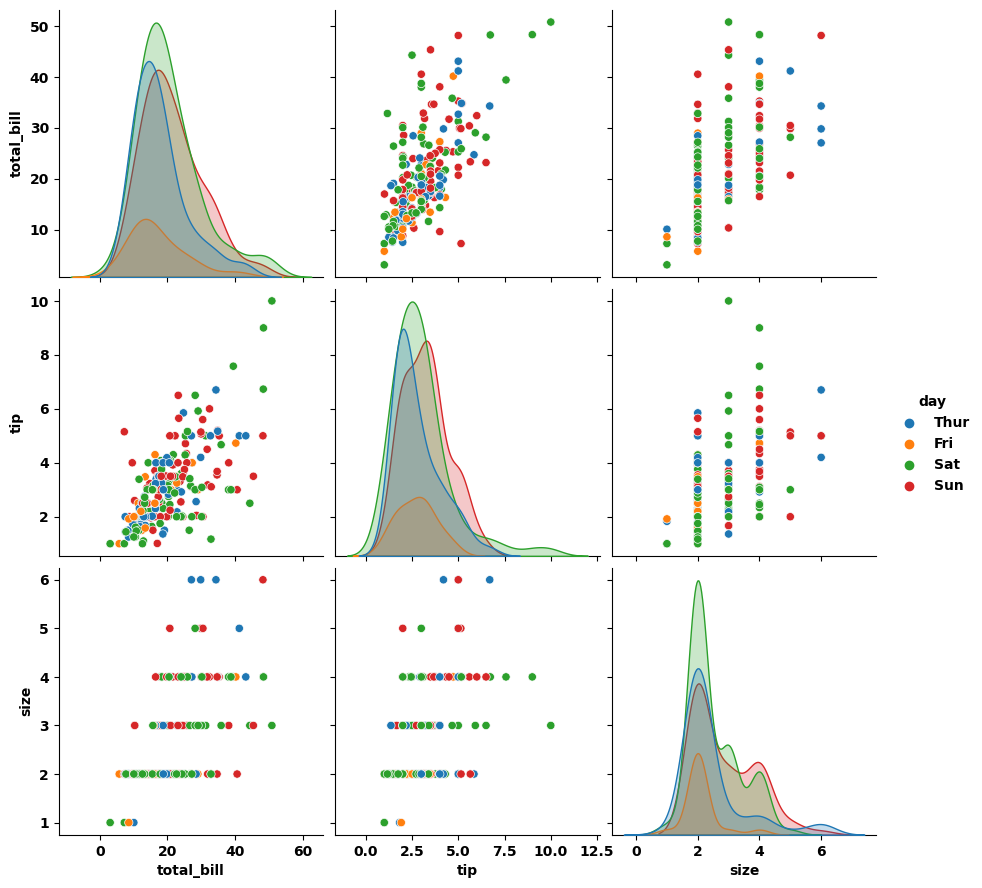

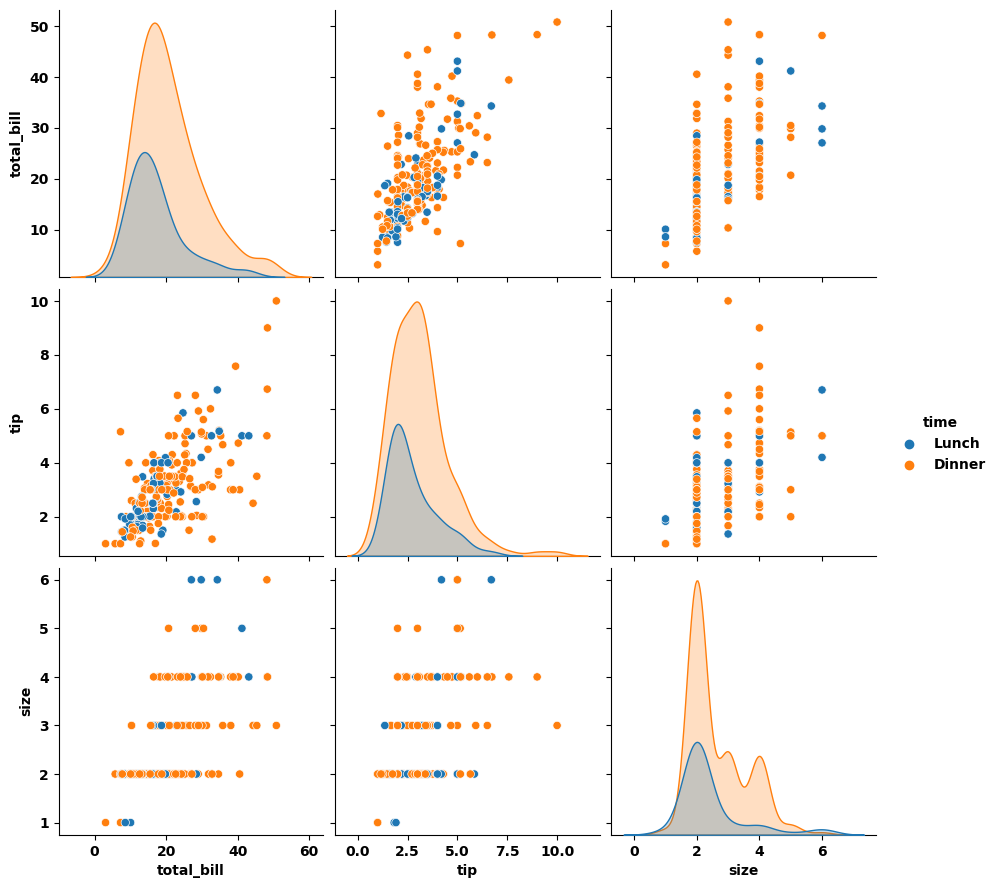

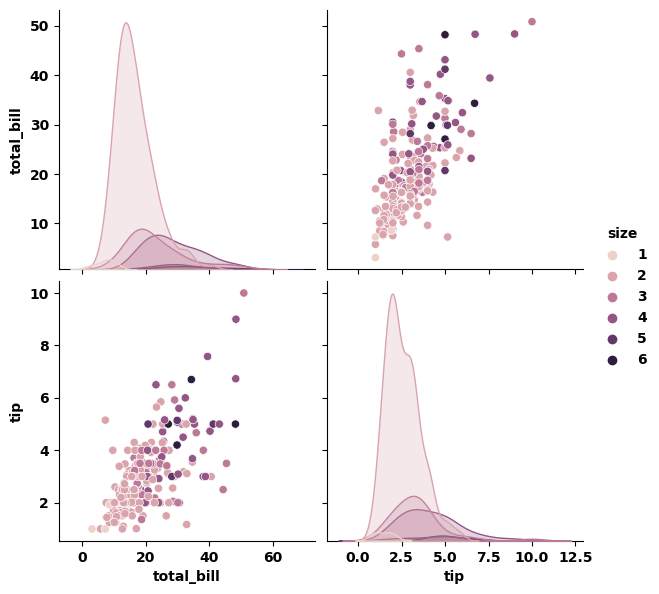

In [110]:
## Solución
# Ejercicio 5.2.6
sns.pairplot(tips, hue='sex', height=3)
sns.pairplot(tips, hue='smoker', height=3)
sns.pairplot(tips, hue='day', height=3)
sns.pairplot(tips, hue='time', height=3)
sns.pairplot(tips, hue='size', height=3)

In [83]:
## Solución
# Ejercicio 5.2.7
"Segun hemmos podido observar en las graficas y datos del dataset podemos llegar a la siguiente conclusion: Cuanto mayor es el numero de comensales del sexo masculino mayor es el numero de propinas.dado que los hombres dejan un 30% mas que las mujeres."

'Segun hemmos podido observar en las graficas y datos del dataset podemos llegar a la siguiente conclusion: Cuanto mayor es el numero de comensales del sexo masculino mayor es el numero de propinas.dado que los hombres dejan un 30% mas que las mujeres.'

In [85]:
## Solución
# Ejercicio 5.2.8
cuartil_3=tips['tip'].quantile(0.75)
tips_filtrado=tips[tips['tip']>=cuartil_3]
tips_filtrado

,total_bill,tip,sex,smoker,day,time,size
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
15,21.58,3.92,Male,No,Sun,Dinner,2
17,16.29,3.71,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
211,25.89,5.16,Male,Yes,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
238,35.83,4.67,Female,No,Sat,Dinner,3


Text(0, 0.5, 'Valores')

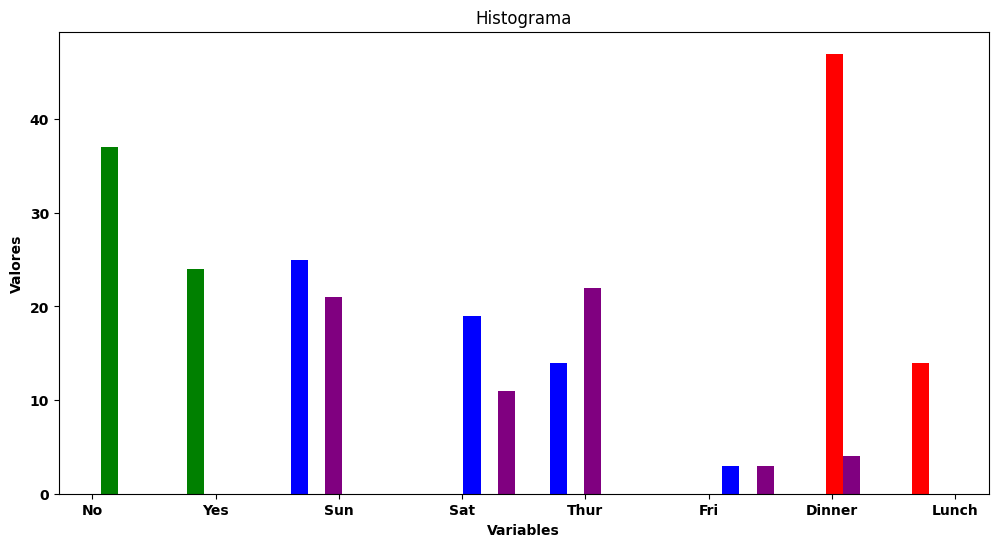

In [107]:
## Solución
# Ejercicio 5.2.9
histo_tips=tips_filtrado[['smoker','day','time','size']]
plt.hist(histo_tips,color=['green','blue','red','purple'])
plt.title('Histograma')
plt.xlabel('Variables')
plt.ylabel('Valores')

In [111]:
## Solución
# Ejercicio 5.2.10
"Segun bajo el analisis que he podido llevar acabo,lo mas optimo para aumentar exponencialmente el numero de propinas para el camarero,seria priorizar la atencion a los grupos formados con mayor porcentage de hombres y mayor numero de comensales"

'Segun bajo el analisis que he podido llevar acabo,lo mas optimo para aumentar exponencialmente el numero de propinas para el camarero,seria priorizar la atencion a los grupos formados con mayor porcentage de hombres y mayor numero de comensales'